# Imports

In [ ]:
# Second notebook file for the Python Workshop in GIKI 2025

Adapted by Asad Mahmood and Taj. Khan from the [Github Python Image Processing tutorial](https://github.com/dalmia/Coursera-Specializations)

In [1]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import downscale_local_mean
%matplotlib inline

In [4]:
#img = misc.face()
from scipy import datasets
image = datasets.face()

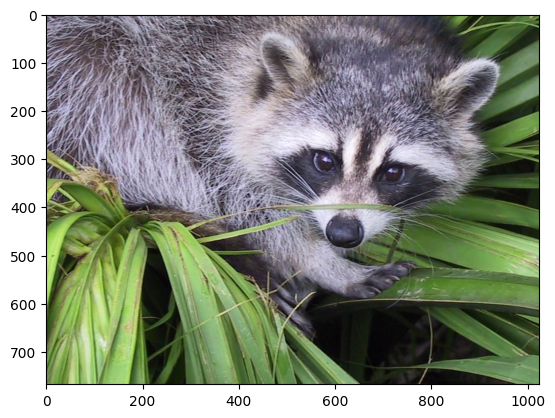

In [5]:
plt.imshow(img)

0

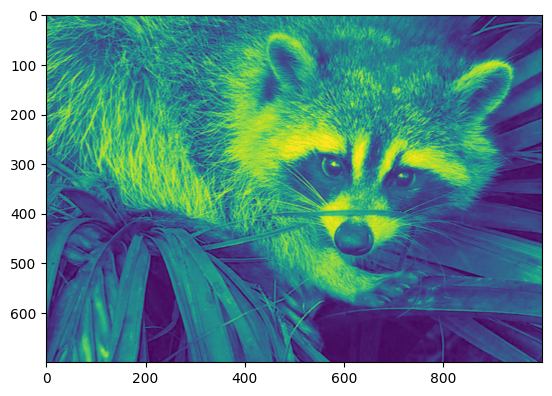

In [23]:
np.shape(img)
#print(img[1:5,1:5,1])
img1=img[0:700,0:1000,2]
plt.imshow(img1)
img.max()
img.min()

# Reduce Intensity

In [ ]:
def reduce_intensity(img, intensity):
    factor = 256 / intensity
    img = np.floor(img / factor) * factor
    return img

In [ ]:
intensities = [2, 4, 8, 16, 64, 128]

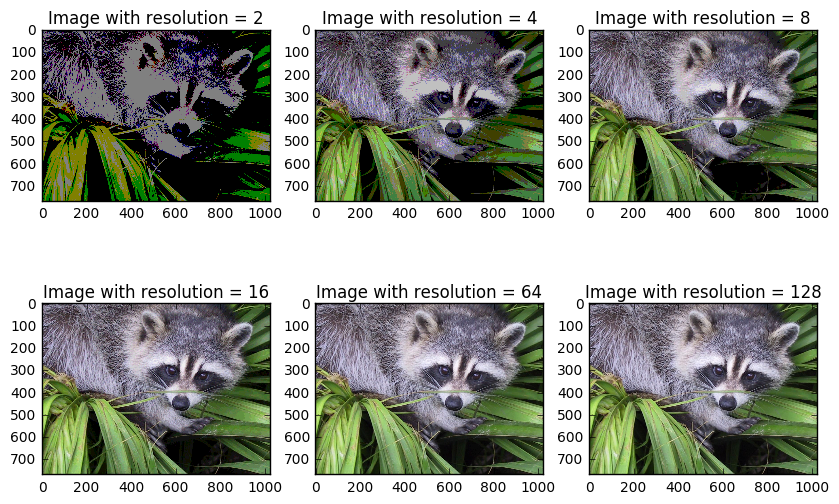

In [ ]:
plt.figure(figsize=(10,10))
columns = 3
for i,intensity in enumerate(intensities):
    img_ = reduce_intensity(img, intensity).astype(np.uint8)
    plt.subplot(len(intensities)/columns + 1, columns, i+1)
    plt.title('Image with resolution = %d' % intensity)
    plt.imshow(img_)

# Averaging filter

In [ ]:
def averaging_filter(img, filter_size=3):
    filtered_image = ndimage.uniform_filter(img, filter_size)
    return filtered_image.astype(img.dtype)

In [ ]:
filter_sizes = [3, 11, 15, 21]

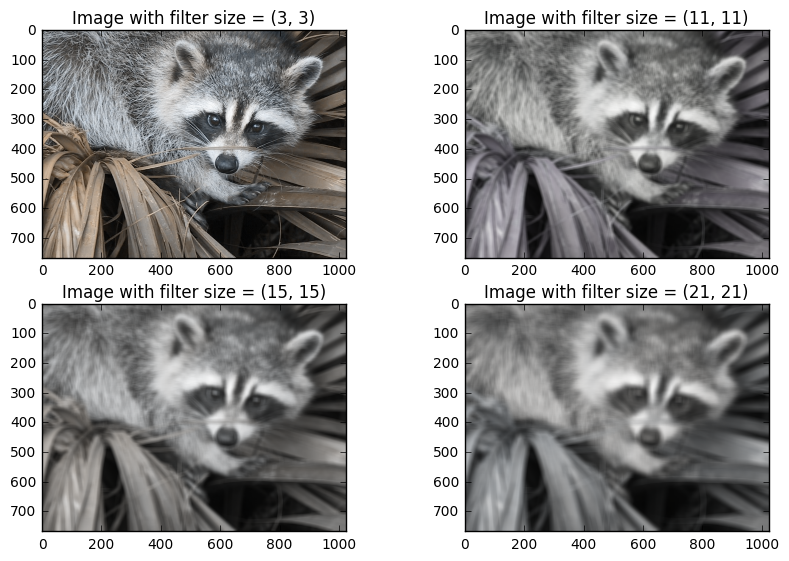

In [ ]:
plt.figure(figsize=(10,10))
columns = 2
for i,filter_size in enumerate(filter_sizes):
    img_ = averaging_filter(img, filter_size)
    plt.subplot(len(filter_sizes)/columns + 1, columns, i+1)
    plt.title('Image with filter size = (%d, %d)' % (filter_size, filter_size))
    plt.imshow(img_)

# Rotate image

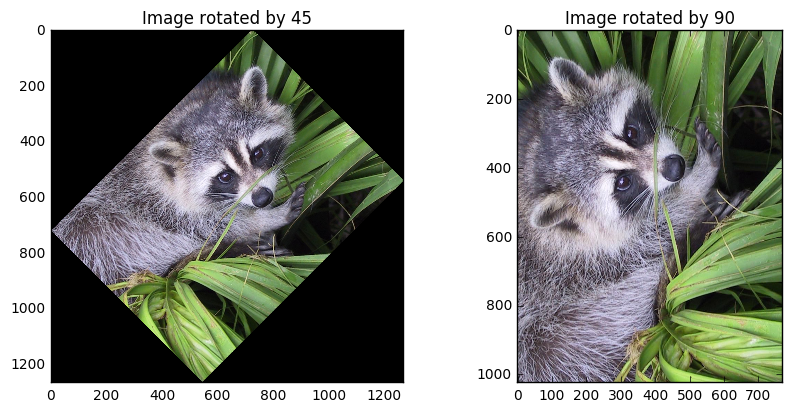

In [ ]:
plt.figure(figsize=(10,10))
columns = 2
rotations = [45, 90]
for i,rotation in enumerate(rotations):
    img_ = ndimage.interpolation.rotate(img, rotation)
    plt.subplot(len(rotations)/columns + 1, columns, i+1)
    plt.title('Image rotated by %d' % rotation)
    plt.imshow(img_)

# Downsample image

In [ ]:
def downsample(img, filter_size):
    if len(img.shape) == 2:
        return downscale_local_mean(img, (filter_size, filter_size)).astype(img.dtype)
    return downscale_local_mean(img, (filter_size, filter_size, 1)).astype(img.dtype)

In [ ]:
filter_sizes = [3, 5, 7]

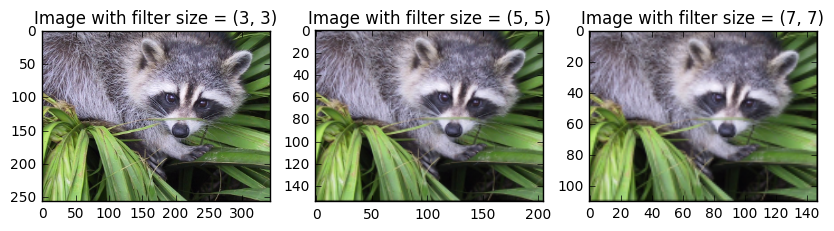

In [ ]:
plt.figure(figsize=(10,10))
columns = 3
for i,filter_size in enumerate(filter_sizes):
    img_ = downsample(img, filter_size)
    plt.subplot(len(filter_sizes)/columns + 1, columns, i+1)
    plt.title('Image with filter size = (%d, %d)' % (filter_size, filter_size))
    plt.imshow(img_)